# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string
import warnings
warnings.filterwarnings('ignore')


# Functions

In [2]:
def clean_word(text):
    text = text.lower()
    text = re.sub ('\[.*?\]','',text)
    
    text = re.sub ('\\W',' ',text)
    
    text = re.sub ('https?://\S+|www\.\S+','',text)
    
    text = re.sub ('\<.*?>+','',text)

    text = re.sub ('[%s]'% re.escape(string.punctuation),'',text)
    
    text = re.sub ('\n','',text)
    
    text = re.sub ('\w*\d\w*','',text)
    return text 

In [3]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

In [4]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    # Show confusion_matrix classification_report accuracy_score
    print(f'\n accuracy_score = {accuracy_score(y_test,y_predict)* 100:.2f}% \n')
    print(f'confusion_matrix = \n {confusion_matrix(y_test,y_predict)}\n')
    print(f'classification_report = \n {classification_report(y_test,y_predict)}')

    # Heatmap of the confusion matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)
    
    # Fake --> class 0 , Real --> class 1
    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    
    # Labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
        

#  Exploratory Data Analysis (EDA) 

## Read Data

In [5]:
path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
data = pd.read_csv(path, encoding='iso-8859-1')



In [6]:
data.shape

(5572, 5)

In [7]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4748,ham,Thanx u darlin!im cool thanx. A few bday drink...,NaN,NaN,NaN
1164,ham,Well. Im computerless. Time to make some oreo ...,NaN,NaN,NaN
916,ham,Was actually about to send you a reminder toda...,NaN,NaN,NaN
1529,ham,Should I have picked up a receipt or something...,NaN,NaN,NaN
2605,ham,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...,NaN,NaN,NaN
2105,ham,I fetch yun or u fetch?,NaN,NaN,NaN
4803,ham,"Er, hello, things didnÛ÷t quite go to plan Û...",NaN,NaN,NaN
558,ham,Hi Princess! Thank you for the pics. You are v...,NaN,NaN,NaN
1979,ham,Shhhhh nobody is supposed to know!,NaN,NaN,NaN
2623,ham,I'm coming home 4 dinner.,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Check Null Value

In [9]:
data.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

## Check Duplicated values

In [11]:
data.duplicated().sum()

403

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(5169, 2)

In [14]:
data = data.rename(columns={'v1': 'Label', 'v2': 'Msg'})


In [15]:
data

,Label,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
data.describe()

,Label,Msg
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
data.nunique().reset_index()

,index,0
0,Label,2
1,Msg,5169


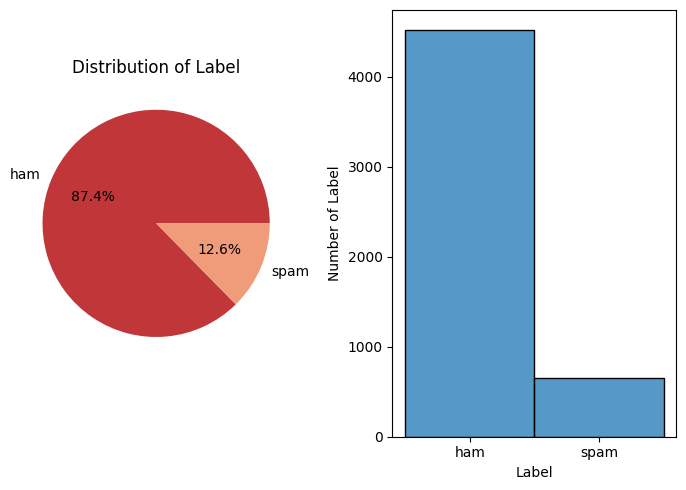

In [18]:
Vsualize('Label',data)

# Convert label to ham =0 & spam = 1

In [19]:
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Label'])
print(le.classes_) #ham = 0 ,spam = 1

['ham' 'spam']


# Length of each text

In [20]:
data['text_length'] = data['Msg'].str.len()

In [21]:
data['text_length'].head()

0    111
1     29
2    155
3     49
4     61
Name: text_length, dtype: int64

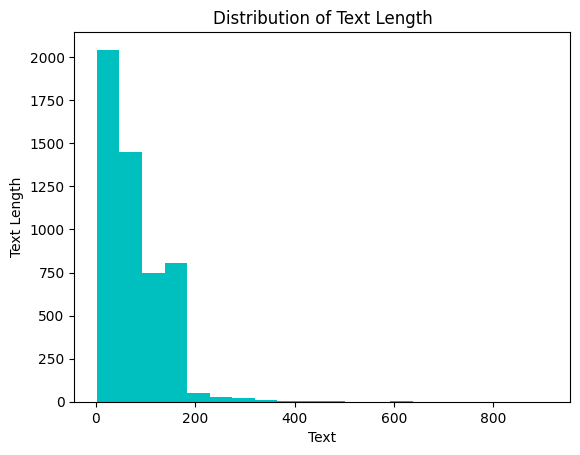

In [22]:
plt.hist(data['text_length'],bins= 20, color='c')
plt.title("Distribution of Text Length")
plt.xlabel("Text")
plt.ylabel("Text Length")
plt.show()

In [23]:
data.columns

Index(['Label', 'Msg', 'text_length'], dtype='object')

# Cleaning Text 

In [24]:
data['Msg'] = data['Msg'].apply(clean_word)

In [25]:
data['Msg'].reset_index()

,index,Msg
0,0,go until jurong point crazy available only ...
1,1,ok lar joking wif u oni
2,2,free entry in a wkly comp to win fa cup final...
3,3,u dun say so early hor u c already then say
4,4,nah i don t think he goes to usf he lives aro...
...,...,...
5164,5567,this is the time we have tried contact u u ...
5165,5568,will ì b going to esplanade fr home
5166,5569,pity was in mood for that so any other s...
5167,5570,the guy did some bitching but i acted like i d...


# Convert UN Balanced Data ---> Balanced Data

In [26]:
majority = data[data['Label'] == 0]
minority = data[data['Label'] == 1]

In [27]:
from sklearn.utils import resample

# Upsample minority class
minority_upsampled = resample(minority,replace=True,n_samples=len(majority), random_state=42)

data_balanced = pd.concat([majority, minority_upsampled])

In [28]:
data_balanced['Label'].value_counts()

Label
0    4516
1    4516
Name: count, dtype: int64

# Split data

In [29]:
x = data_balanced['Msg']
y =data_balanced['Label']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 45)

# Converts a collection of text documents into a matrix of TF-IDF features

In [31]:
# class in scikit-learn that converts a collection of text documents into a matrix of TF-IDF features
vectorization = TfidfVectorizer()

# earn the vocabulary and TF-IDF values from the training set and transform the text into TF-IDF vectors for the training data
xv_train = vectorization.fit_transform(x_train)

# use the previously learned vocabulary and IDF values from the training set to transform the test data into TF-IDF vectors
xv_test = vectorization.transform(x_test)

# Train and Test Data in ML Models 



 accuracy_score = 98.67% 

confusion_matrix = 
 [[1326    9]
 [  27 1348]]

classification_report = 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1335
           1       0.99      0.98      0.99      1375

    accuracy                           0.99      2710
   macro avg       0.99      0.99      0.99      2710
weighted avg       0.99      0.99      0.99      2710



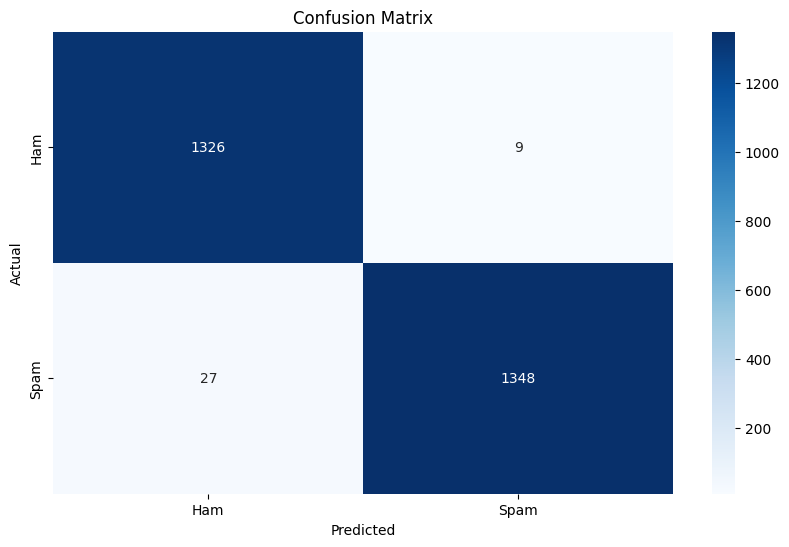

In [32]:
train_test_model(LogisticRegression(),xv_train,xv_test,y_train,y_test)




 accuracy_score = 97.38% 

confusion_matrix = 
 [[1268   67]
 [   4 1371]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1335
           1       0.95      1.00      0.97      1375

    accuracy                           0.97      2710
   macro avg       0.98      0.97      0.97      2710
weighted avg       0.97      0.97      0.97      2710



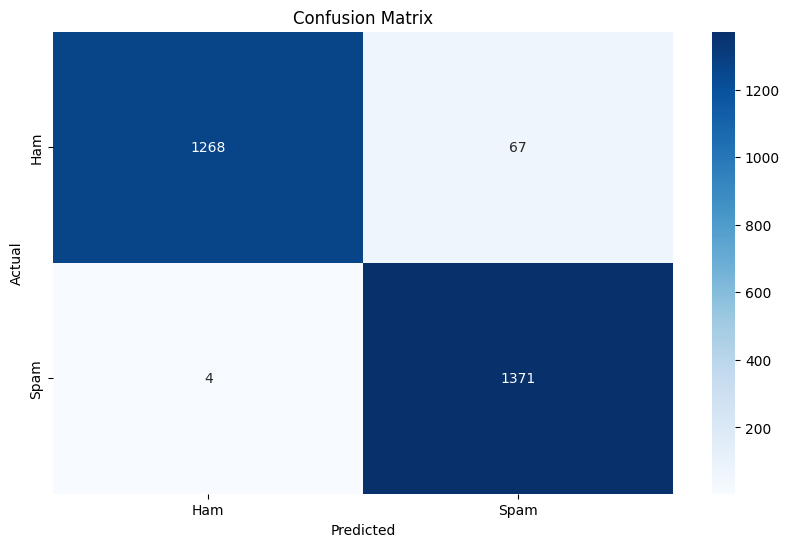

In [33]:
train_test_model (DecisionTreeClassifier(),xv_train,xv_test,y_train,y_test)